In [204]:
from scipy.stats import rayleigh
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np

pd.set_option('display.max_column',500)

df=pd.read_csv('2T_Rdatab.csv')
df.head()

df['RT']=df['STO_TS']-1.98
df['RS']=df['STO_LES']-1.67
RT=list(df['RT'])
RS=list(df['RS'])
df[['RT','RS']].describe()

,RT,RS
count,91.000000,91.000000
mean,11.396381,2.503549
std,0.913733,0.175911
min,9.728849,2.176949
25%,10.813675,2.373750
50%,11.263351,2.475750
75%,11.968450,2.570575
max,14.190750,3.025800


9.618969640828468 1.4115103919292302
11.388035570001115 0.9247318050596822


(13, 16)

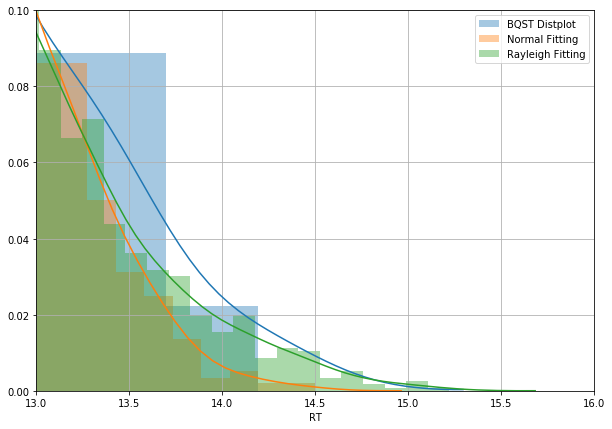

In [203]:
#Rayleigh fitting
LOC,SCALE=rayleigh.fit(RT)                                                    #fitting
RT_ray=rayleigh.rvs(loc=LOC, scale=SCALE, size=10000)                         #generate data
RT_mean, RT_var = rayleigh.stats(loc=LOC, scale=SCALE,moments='mv')
print (LOC,SCALE)
print( RT_mean, np.sqrt(RT_var)) 

#RT normal distribution
m=df['RT'].mean()
s=df['RT'].std()
RT_normal=np.random.normal(m,s,10000)


# plot
fig = plt.gcf()
fig.set_size_inches(10, 7)
sns.distplot(df['RT'], label="BQST Distplot" )        #BQST distibution
sns.distplot(RT_normal, label='Normal Fitting')
sns.distplot(RT_ray, label="Rayleigh Fitting")         #Rayleigh fitted data distibution
plt.legend()
plt.grid()
plt.ylim(bottom=0,top=0.1)
plt.xlim(left=13,right=16)




In [243]:
def findRayleighLocScale(targetMean, targetSigma):
    mini=0.00001
    maxi=20.0
    mid_s=10.0
#find scale parameter    
    while np.abs(rayleigh.std(1,mid_s)-targetSigma)>0.001*targetSigma:
        if (rayleigh.std(1,mid_s)-targetSigma)>0:
            maxi=mid_s
            mid_s=(mini+maxi)/2
        else:
            mini=mid_s
            mid_s=(mini+maxi)/2            
    
   
    mini=1
    maxi=100
    mid_l=50.0   
#find loc parameter        
    while np.abs(rayleigh.mean(mid_l,mid_s)-targetMean)>0.001*targetMean:
        if rayleigh.mean(mid_l,mid_s)-targetMean>0:
            maxi=mid_l
            mid_l=(mini+maxi)/2
        else:
            mini=mid_l
            mid_l=(mini+maxi)/2           
    
    return mid_l,mid_s

In [244]:
L,S=findRayleighLocScale(11.3,0.92)    #target mean and sigma -> return loc and scale
print (L,S)

9.54150390625 1.4038171899414063


In [144]:
std=rayleigh.std(L, S)
mean=rayleigh.std(L, S)
mean=rayleigh.mean(L, S)
print (mean)
print (std)



1.9600915898847977
0.19601680416656048


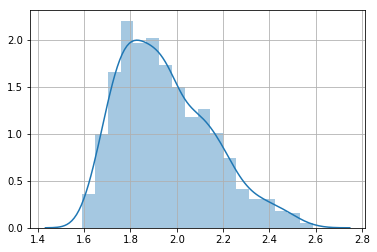

In [146]:
ray=rayleigh.rvs(loc=L, scale=S, size=1000)
sns.distplot(ray)
plt.grid()

In [ ]:
# mean, var, skew, kurt = rayleigh.stats(loc=LOC, scale=SCALE,moments='mvsk')
# ray=rayleigh.rvs(loc=LOC, scale=SCALE, size=1000)
LOC,SCALE=rayleigh.fit(RT)
sns.distplot(df['RT'])
TS_ray=rayleigh.rvs(loc=LOC, scale=SCALE, size=1000)
TS_mean, TS_var = rayleigh.stats(loc=LOC, scale=SCALE,moments='mv')
print (LOC,SCALE)
print('Stat')
print( TS_mean, np.sqrt(TS_var))



1125.251665493666 65.56935997269989


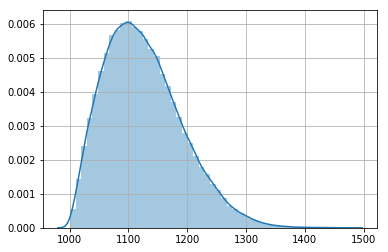

In [277]:
ray=rayleigh.rvs(loc=1000, scale=100, size=100000)
sns.distplot(ray)
plt.grid()
print (ray.mean(), ray.std())